In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import string
import codecs
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn import pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
eng_df = pd.read_csv("English_1000")
eng_df.head()

,English
0,"Nature, in the broadest sense, is the natural..."
1,"""Nature"" can refer to the phenomena of the phy..."
2,"The study of nature is a large, if not the onl..."
3,"Although humans are part of nature, human acti..."
4,[1] The word nature is borrowed from the Old F...


In [3]:
french_df = pd.read_csv("french_1000")
french_df.head()

,French
0,Si vous disposez d'ouvrages ou d'articles de r...
1,Comment ajouter mes sources ?
2,Cette page ou section est en train d'être trad...
3,Vous pouvez aider au développement de Wikipédi...
4,Le mot nature est un terme polysémique (c’est-...


In [4]:
russian_df = pd.read_csv("Russian_1000")
russian_df.head()

,Russian
0,занимает пятое место в диптихе автокефальных п...
1,много сделал для понимания деятельности м в ло...
2,расписывал храмы в костромской нижегородской и...
3,производство мл- велось только на заводе № в ...
4,московская патриархия — учреждение русской пра...


In [5]:
chinese_df = pd.read_csv("Chinese_1000")
chinese_df.head()

,Chinese
0,胡赛尼本人和小说的主人公阿米尔一样，都是出生在阿富汗首都喀布尔，少年时代便离开了这个国家。胡...
1,年月日，參與了「snh第三屆年度金曲大賞best 」。月日，出演由优酷视频，盟将威影视，嗨乐...
2,在他们出发之前，罗伯特·菲茨罗伊送给了达尔文一卷查尔斯·赖尔所著《地质学原理》（在南美他得到...
3,系列的第一款作品《薩爾達傳說》（ゼルダの伝説）在年月日於日本發行，之後在年內於美國和歐洲地區...
4,历史上的柔远驿是为了给琉球贡使及随员提供食宿之所，同时它也成为中琉间商业和文化交流的枢纽。琉...


In [6]:
spanish_df = pd.read_csv("Spanish_1000")
spanish_df.head()

,Spanish
0,Nature es una de las más prestigiosas revistas...
1,Su primer número fue publicado el 4 de noviemb...
2,"[2]​ Con una periodicidad semanal, la revista ..."
3,"Nature tiene oficinas en Londres, Nueva York, ..."
4,La editorial publica también varias revistas e...


In [7]:
hindi_df = pd.read_csv("Hindi_1000")
hindi_df

,Hindi
0,महाराष्ट्र मई को भारत का राज्य बनाया गया था।...
1,मुन्दुम नेरियथुम साडी जो केवल एक पारंपरिक पोशा...
2,साधु सुन्दर सिंह की मां का देहांत तब हुआ जब वे...
3,में बिहार के तत्कालीन मुख्यमंत्री लालू प्रसाद...
4,आर्किमिडिज़ यूनानी ἀρχιμήδης लगभग – ईपू प्रा...
...,...
995,पराग बैंक में पराग कण को संग्रह किया जाता है। ...
996,अश्वशाव या इक्वूलियस एक छोटा-सा तारामंडल है जो...
997,केन्द्रीय विद्यालयों के प्रमुख चार मिशन इस प्र...
998,मास्तीजी अपने जन्मदिवस पर स्वर्गवासित हो गए। ...


In [8]:
tamil_df = pd.read_csv("Tamil_1000")
tamil_df

,Tamil
0,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...
1,ஆங்கில எழுத்துக்களை மட்டும் அல்லாமல் பன்மொழி எ...
2,இரண்டு மீட்டர்களும் ஒரு அரை மீட்டரும் இணைந்த ந...
3,இந்த இரண்டு வகையிலும் வரையறுக்கப்பட்ட பொறுப்பு...
4,பெருந்தோட்டம் என்பது தொலைதூரச் சந்தைகளுக்காகப்...
...,...
995,சேக் சயத் மசூதி ஐக்கிய அரபு அமீரகத்தின் தலைநகர...
996,அடியார்களுக்கு அன்னமிடுவதை வழக்கமாக கொண்டிருந்...
997,களர் சம்பா kalar samba என்று அழைக்கப்படும் இந்...
998,யூலரின் முறை முதல் வரிசையாகும் உறுதியான தன்மை ...


In [9]:
indonesian_df = pd.read_csv("Indonesian_1000")
indonesian_df

,Indonesian
0,kemunculan pertamanya adalah ketika mencium ka...
1,walter kaudern dalam bukunya menyatakan wawo l...
2,bintang ini memiliki nama tradisional sulafat ...
3,dalam bahasa inggris istilah easter paskah men...
4,ia menikahi giacomina wafat februari putri u...
...,...
995,walaupun pada mulanya berhasil menurunkan ting...
996,namun dalam usia hari akhirnya meninggal duni...
997,dewan wali terlibat dalam proses legislasi den...
998,ordo ekuestrian makam kudus yerusalem bahasa l...


In [10]:
romanian_df = pd.read_csv("romanian_1000")
romanian_df

,Romanian
0,de-a lungul vieții watson a fost interesat de ...
1,ianuarie abdullah bin abdulaziz al-saud n abd...
2,iunie universitatea din lisabona a anunțat că...
3,în albania a devenit regat sub conducerea reg...
4,un grup de cercetași din rondul de noapte porn...
...,...
995,decembrie peste de persoane din statul filip...
996,după război în watson a fost numit președinte...
997,constantin petala n aprilie - d ? a fost unu...
998,conform recensământului efectuat în populația...


In [11]:
eng_data = []
eng_lang = []
for i in range(0, len(eng_df)):
    review = re.sub('[^a-zA-Z]', ' ', eng_df['English'][i])
    review = review.lower()
    review = review.split()
    review = ' '.join(review)
    eng_data.append(review)
    eng_lang.append('English')

In [12]:
regular_punct = list(string.punctuation)


In [13]:
russian_data = []
russian_lang = []
for i,line in russian_df.iterrows():
    line = line["Russian"]
    if len(line) != 0:
        line  = line.lower()
        line = re.sub(r"\d+","",line)   
        line = re.sub(r"[[]]","",line)
        line = re.sub(r'[-«»!@#$—(),n"%^*?:;~`]', ' ', line)
        russian_data.append(line)
        russian_lang.append('Russian')


C:\Users\avisi\AppData\Local\Temp/ipykernel_7920/1039438560.py:8: FutureWarning: Possible nested set at position 1
  line = re.sub(r"[[]]","",line)


In [14]:
spanish_data = []
spanish_lang = []
for i in range(0, len(spanish_df)):
    review = re.sub('[^a-zA-Z]', ' ', spanish_df['Spanish'][i])
    review = review.lower()
    review = review.split()
    review = ' '.join(review)
    spanish_data.append(review)
    spanish_lang.append("Spanish")

In [15]:
french_lang = []
french_data = []
for i in range(0, len(french_df)):
    review = re.sub('[^a-zA-Z]', ' ', french_df['French'][i])
    review = review.lower()
    review = review.split()
    review = ' '.join(review)
    french_data.append(review)
    french_lang.append("French")

In [16]:
chinese_lang = []
chinese_data = []
for i in range(0, len(chinese_df)):
    review = re.sub('[a-zA-Z0-9]', ' ', chinese_df['Chinese'][i])
    review = review.lower()
    review = review.split()
    review = [words for words in review if not words in regular_punct]
    review = ' '.join(review)
    chinese_data.append(review)
    chinese_lang.append("Chinese")

In [17]:
import string
hindi_lang = []
hindi_data = []
for i in range(0, len(hindi_df)):
    line = re.sub(r'[\। -«»!@#$—(),n"%^*?:;~`]', ' ', hindi_df['Hindi'][i])
    line  = line.lower()
    line = line.replace("\u200d", "") # removing unicode
    line = re.sub('[a-zA-Z0-9]',"",line)   
    line = re.sub(r"[[]]","",line)
    line = line.split()
    line = ' '.join(line)
    hindi_data.append(line)
    hindi_lang.append("Hindi")

In [18]:
tamil_lang = []
tamil_data = []
for i in range(0, len(tamil_df)):
    review = re.sub('[a-zA-Z0-9\। -«»!@#$—(),n"%^*?:;~`]', ' ', tamil_df['Tamil'][i])
    review = review.lower()
    review = review.replace("\u200d", "") # removing unicode
    review = review.split()
    review = ' '.join(review)
    tamil_data.append(review)
    tamil_lang.append("Tamil")

In [19]:
indonesian_lang = []
indonesian_data = []
for i in range(0, len(indonesian_df)):
    review = re.sub('[^a-zA-Z]', ' ', indonesian_df['Indonesian'][i])
    review = review.lower()
    review = review.split()
    review = ' '.join(review)
    indonesian_data.append(review)
    indonesian_lang.append("Indonesian")

In [20]:
df =pd.DataFrame({"Text": eng_data + french_data + spanish_data + chinese_data + russian_data + hindi_data + tamil_data 
                  + indonesian_data ,
                  "Language": eng_lang + french_lang + spanish_lang + chinese_lang + russian_lang + hindi_lang + tamil_lang
                  + indonesian_lang })
df.head()

,Text,Language
0,nature in the broadest sense is the natural ph...,English
1,nature can refer to the phenomena of the physi...,English
2,the study of nature is a large if not the only...,English
3,although humans are part of nature human activ...,English
4,the word nature is borrowed from the old frenc...,English


In [21]:
df.tail()

,Text,Language
7814,walaupun pada mulanya berhasil menurunkan ting...,Indonesian
7815,namun dalam usia hari akhirnya meninggal dunia...,Indonesian
7816,dewan wali terlibat dalam proses legislasi den...,Indonesian
7817,ordo ekuestrian makam kudus yerusalem bahasa l...,Indonesian
7818,felidae adalah familia mamalia yang berevolusi...,Indonesian


In [22]:
df['Language'].value_counts()

English       1000
French        1000
Chinese       1000
Russian       1000
Hindi         1000
Tamil         1000
Indonesian    1000
Spanish        819
Name: Language, dtype: int64

In [23]:
text=df['Text']
text

0       nature in the broadest sense is the natural ph...
1       nature can refer to the phenomena of the physi...
2       the study of nature is a large if not the only...
3       although humans are part of nature human activ...
4       the word nature is borrowed from the old frenc...
                              ...                        
7814    walaupun pada mulanya berhasil menurunkan ting...
7815    namun dalam usia hari akhirnya meninggal dunia...
7816    dewan wali terlibat dalam proses legislasi den...
7817    ordo ekuestrian makam kudus yerusalem bahasa l...
7818    felidae adalah familia mamalia yang berevolusi...
Name: Text, Length: 7819, dtype: object

In [24]:
# separating the independent and dependant features
X,y = df.iloc[:,0],df.iloc[:,1]

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(text).toarray()

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6255, 60356)
(1564, 60356)
(6255,)
(1564,)


In [28]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [29]:
model.fit(X_train,y_train)

MultinomialNB()

In [30]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
y_pred = model.predict(X_test)
y_pred

array([2, 4, 3, ..., 2, 7, 4])

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [33]:
print("Accuracy is :",ac)

Accuracy is : 0.9533248081841432


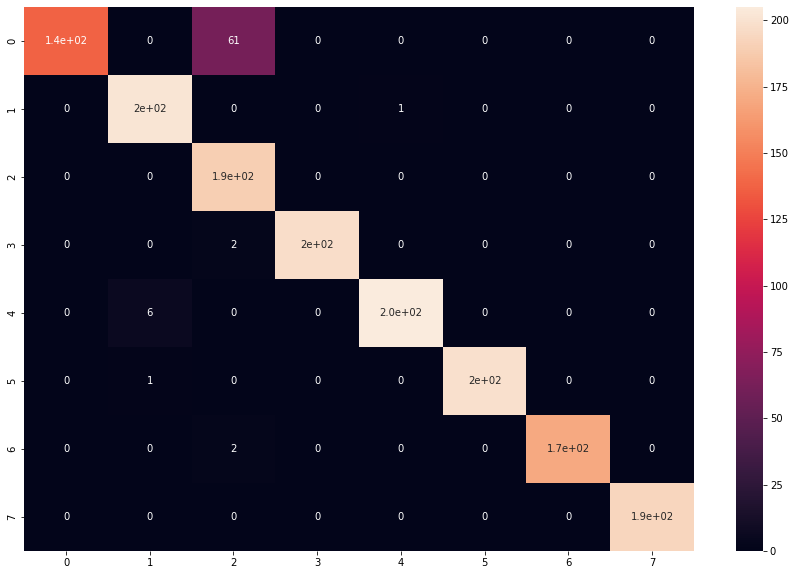

In [34]:
# visualising the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [35]:
def predict(text):
    x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
    lang = model.predict(x) # predicting the language
    lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
    print("The langauge is in",lang[0]) # printing the language

In [36]:
#chinese
predict("这次计划的失败被归咎于军方高层之间缺乏沟通")

The langauge is in Chinese


In [37]:
#english
predict("The study of nature is a large")

The langauge is in English


In [38]:
#spanish
predict("La editorial publica también varias rev")

The langauge is in Spanish


In [39]:
#french
predict("Vous pouvez aider au développement")

The langauge is in French


In [40]:
#russian
predict("дмитрий")

The langauge is in Russian


In [41]:
#hindi
predict("पराग ")

The langauge is in Hindi


In [42]:
#tamil
predict("அனாதரவற்ற")

The langauge is in Tamil


In [43]:
#indonesian
predict("ordo ekuestrian makam kudus")

The langauge is in Indonesian
